# Lead Scoring Case study

## Problem statement

An education company named X Education sells online courses to industry professionals.
On any given day, many professionals who are interested in the courses land on their website and browse for courses.
When these people fill up a form providing their email address or phone number, they are classified to be a lead.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. 
Through this process, some of the leads get converted while most do not.Now, although X Education gets a lot of leads,
its lead conversion rate is very poor.Build a logistic regression model to assign a lead score between 0 and 100 to each of 
the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot,
i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. 

## Importing Necessary Libraries

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

## Data Loading

In [2]:
#loading Leads.csv
df_Leads=pd.read_csv("Leads.csv")

In [3]:
#Viewing first two rows of the dataset.
#We can see some 'Select' values.
df_Leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


## Data Understanding for dataset

In [4]:
#lets understand the dataset for Leads.csv.
#We can see the Leads data contains 9240 records and 37 columns.
df_Leads.shape

(9240, 37)

In [5]:
#There are 4-float,3-integer and 30-object type of columns
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking important values for numerical data in leads dataset.
df_Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Number of columns containing the null values
len(df_Leads.columns[df_Leads.isnull().any()].tolist())

17

## Data Cleaning for dataset

We will prepare the data for analysis.
To prepare for analysis we will remove all kind of irregularies inside data.
like missing values,outliers/anomalies,incorrect format,inconsistent spelling

### Missing values check for dataset

strategies to handle missing values can be removing or imputing them with some values like
mean,median or mode.

In [8]:
#From below we can infer that there are many columns having missing values more than 40%
#Columns with more than 40% missing values starightaway dropping them.
100 * df_Leads.isnull().sum()/len(df_Leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
#We have seen few values as 'Select' which means the values are not provided.
#change 'Select' to NaN
df_Leads = df_Leads.replace('Select',np.nan)

In [10]:
#Columns with more than 40% missing values starightaway dropping them.
100 * df_Leads.isnull().sum()/len(df_Leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
#Name of columns having missing values more than or equal to 40%
maxNullColumns=df_Leads.columns[(100 * df_Leads.isnull().sum()/len(df_Leads)) >=40].tolist()

In [12]:
len(maxNullColumns)

7

In [13]:
#Let's drop 5 columns with missing values more than 40%
df_Leads=df_Leads.drop(maxNullColumns,axis=1)

In [14]:
#Checking unique values in each columns
df_Leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [15]:
#Dropping the columns with only 1 unique values as it won't contribute much in analysis.
df_Leads=df_Leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)


In [16]:
df_Leads.shape

(9240, 25)

### Data imputation-for leads dataset.

In [17]:
#after dropping let's check one by one missing values columns in leads data
(100 * df_Leads.isnull().sum()/len(df_Leads) ).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Prospect ID                                       0.0000

In [18]:
#Checking categorical data
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [19]:
#filling categorical data with mode
df_Leads['City']=df_Leads['City'].fillna(df_Leads['City'].mode()[0])
df_Leads['Specialization']=df_Leads['Specialization'].fillna(df_Leads['Specialization'].mode()[0])
df_Leads['Tags']=df_Leads['Tags'].fillna(df_Leads['Tags'].mode()[0])
df_Leads['What matters most to you in choosing a course']=df_Leads['What matters most to you in choosing a course'].fillna(df_Leads['What matters most to you in choosing a course'].mode()[0])
df_Leads['What is your current occupation']=df_Leads['What is your current occupation'].fillna(df_Leads['What is your current occupation'].mode()[0])
df_Leads['Country']=df_Leads['Country'].fillna(df_Leads['Country'].mode()[0])
df_Leads['Last Activity']=df_Leads['Last Activity'].fillna(df_Leads['Last Activity'].mode()[0])

In [20]:
# let's check one by one missing values columns in leads data
(100 * df_Leads.isnull().sum()/len(df_Leads) ).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Lead Source                                      0.389610
Prospect ID                                      0.000000
What matters most to you in choosing a course    0.000000
A free copy of Mastering The Interview           0.000000
City                                             0.000000
Tags                                             0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
Lead Number                                      0.000000
Country       

In [21]:
#imputing median for numeric data
df_Leads['TotalVisits']=df_Leads['TotalVisits'].fillna(df_Leads['TotalVisits'].median())
df_Leads['Page Views Per Visit']=df_Leads['Page Views Per Visit'].fillna(df_Leads['Page Views Per Visit'].median())

In [22]:
# let's check one by one missing values columns in leads data
(100 * df_Leads.isnull().sum()/len(df_Leads) ).sort_values(ascending=False)

Lead Source                                      0.38961
Prospect ID                                      0.00000
What is your current occupation                  0.00000
A free copy of Mastering The Interview           0.00000
City                                             0.00000
Tags                                             0.00000
Through Recommendations                          0.00000
Digital Advertisement                            0.00000
Newspaper                                        0.00000
X Education Forums                               0.00000
Newspaper Article                                0.00000
Search                                           0.00000
What matters most to you in choosing a course    0.00000
Specialization                                   0.00000
Lead Number                                      0.00000
Country                                          0.00000
Last Activity                                    0.00000
Page Views Per Visit           

In [23]:
#We are left with missing value in Lead source
df_Leads['Lead Source']=df_Leads['Lead Source'].fillna(df_Leads['Lead Source'].mode()[0])

In [24]:
#Let's check the null values % in each column
#We can see there is no null value left.
(100 * df_Leads.isnull().sum()/len(df_Leads) ).sort_values(ascending=False)

Prospect ID                                      0.0
What is your current occupation                  0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
Specialization                                   0.0
Lead Number                                      0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [25]:
# We are left with 25 columns now.
df_Leads.shape

(9240, 25)

### Removing redundant columns from leads data.

In [26]:
#Removing Prospect ID,Lead Number as it is not relevant for the analysis
df_Leads=df_Leads.drop(['Prospect ID','Lead Number'],axis=1)

In [27]:
df_Leads.shape

(9240, 23)

In [28]:
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

## EDA

## Univariate Analysis for leads data

### Analysing categorical data

In [29]:
#Assigning all object type column to below list
leads_obj_col=[]
leads_obj_col=df_Leads.columns[df_Leads.dtypes=='object'].tolist()
print(leads_obj_col)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [30]:
#see the percentage wise distribution of categories in each columns of object datatype.
# we already made a list of variable of object type.
for i in leads_obj_col:
    print(df_Leads[i].value_counts(normalize=True)*100)
    print('=======================================')

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
No     99.978355
Yes     0.

Countplot of Lead Origin


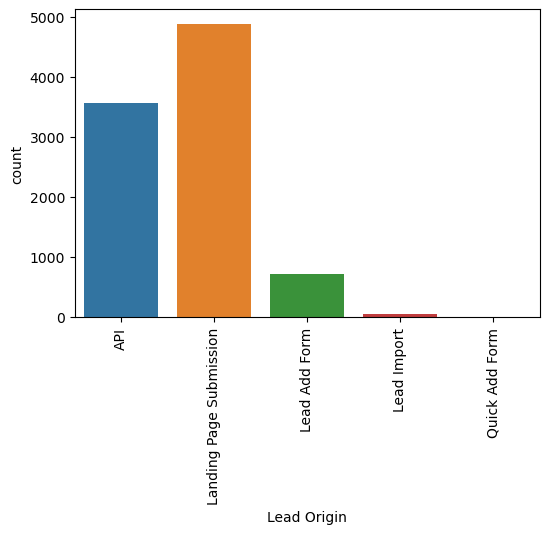

Countplot of Lead Source


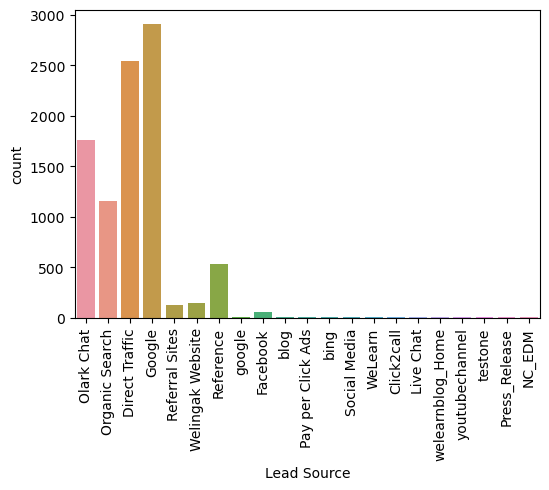

Countplot of Do Not Email


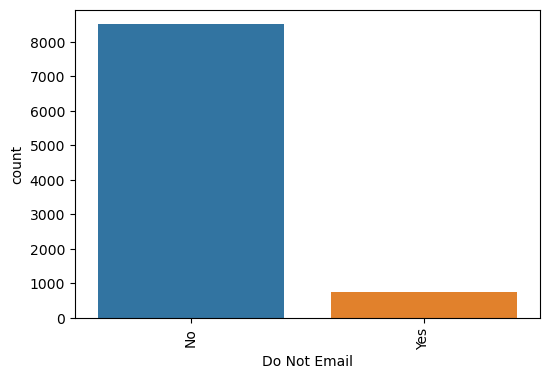

Countplot of Do Not Call


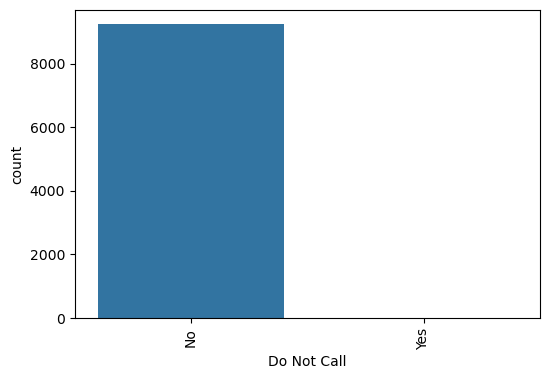

Countplot of Last Activity


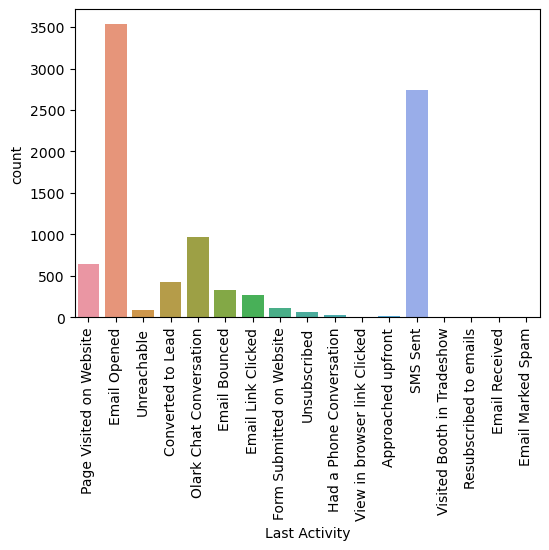

Countplot of Country


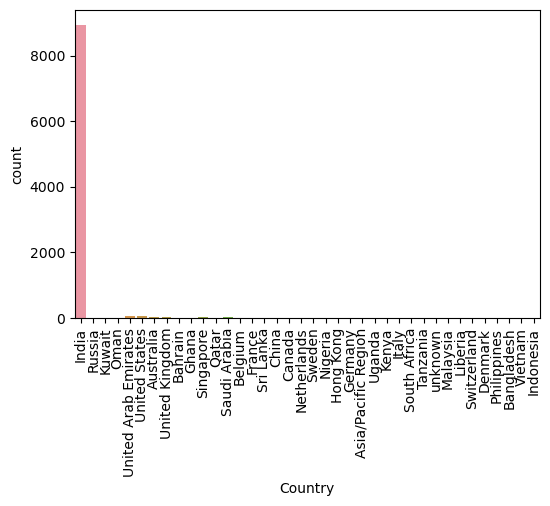

Countplot of Specialization


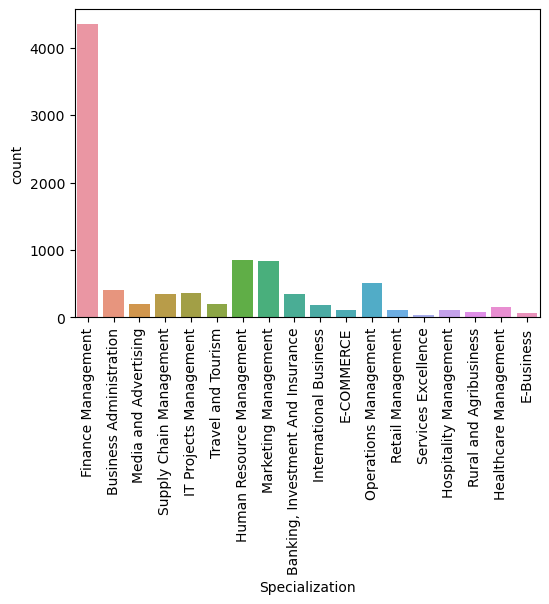

Countplot of What is your current occupation


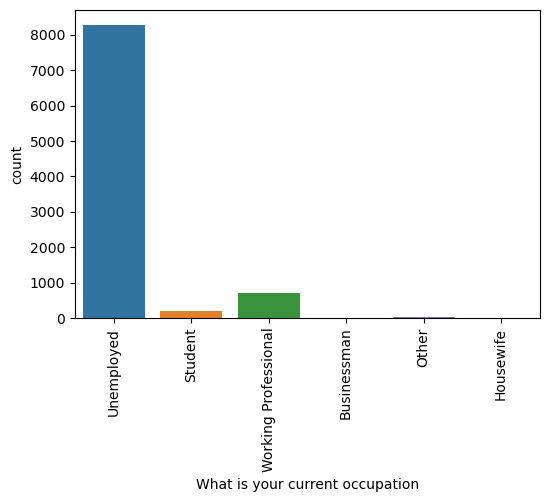

Countplot of What matters most to you in choosing a course


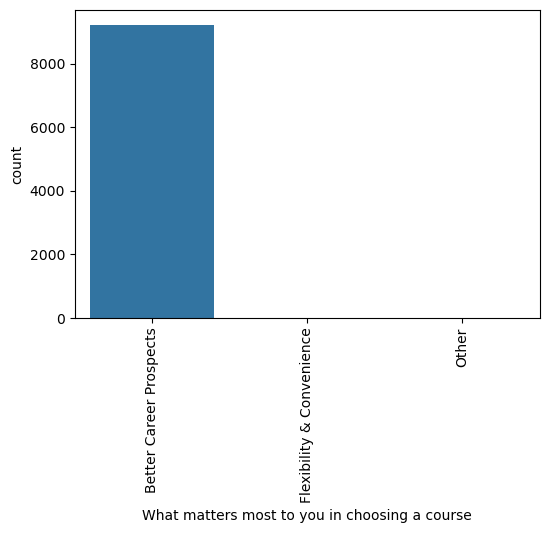

Countplot of Search


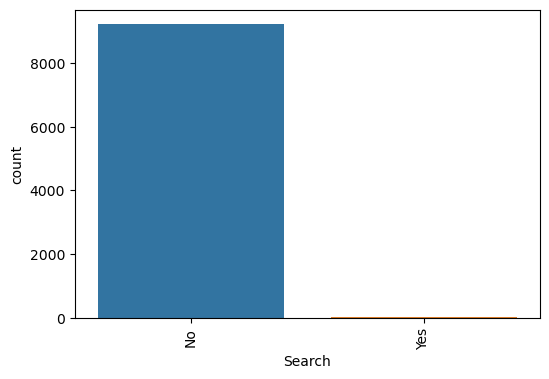

Countplot of Newspaper Article


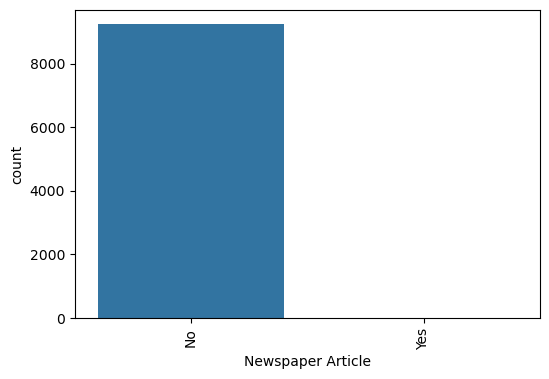

Countplot of X Education Forums


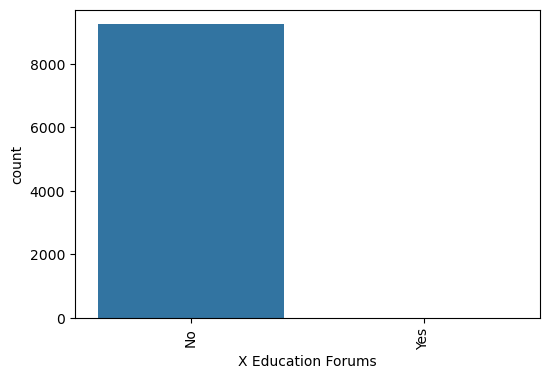

Countplot of Newspaper


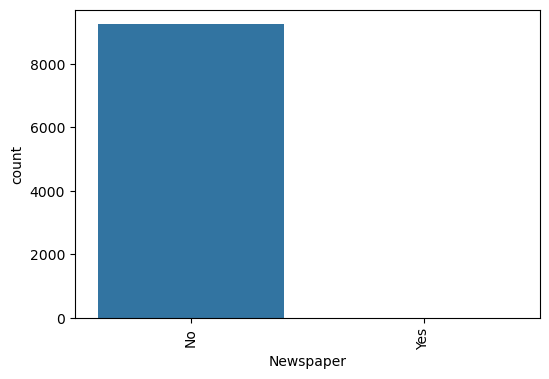

Countplot of Digital Advertisement


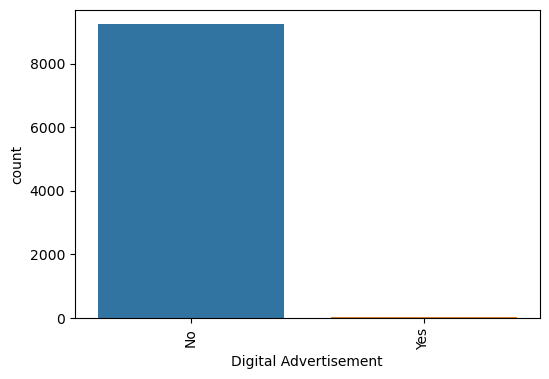

Countplot of Through Recommendations


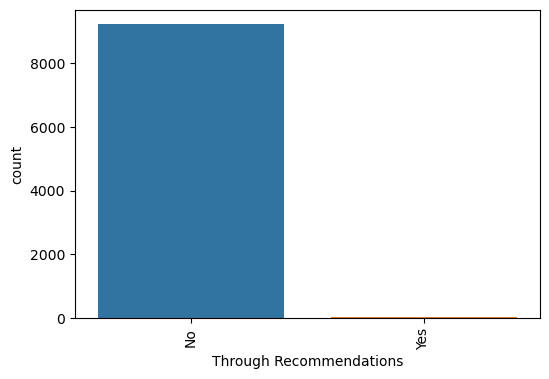

Countplot of Tags


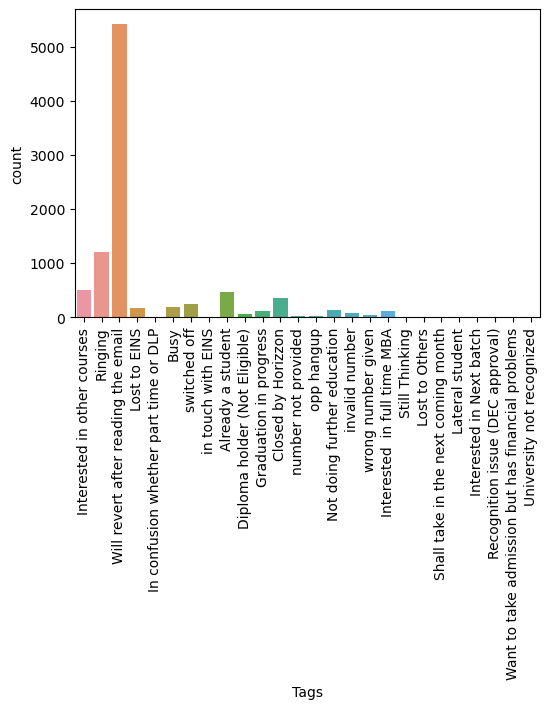

Countplot of City


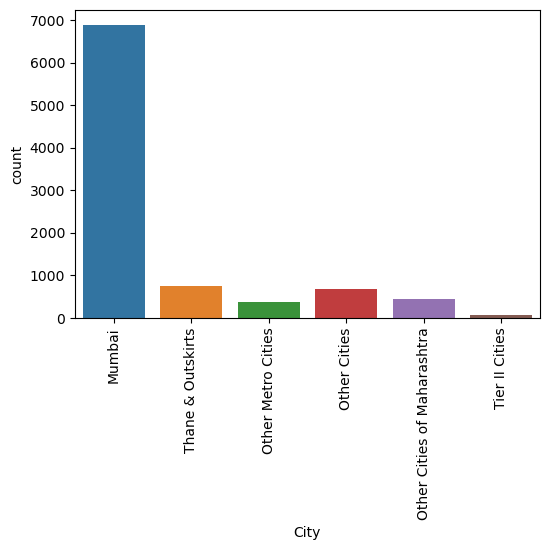

Countplot of A free copy of Mastering The Interview


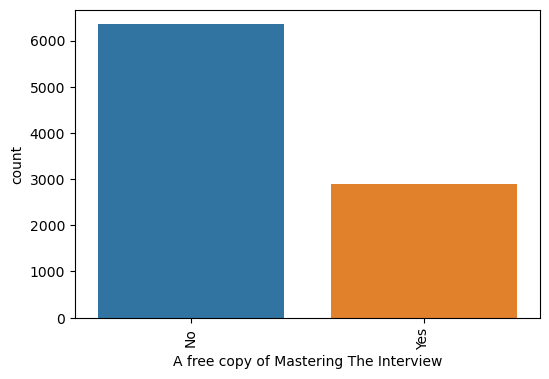

Countplot of Last Notable Activity


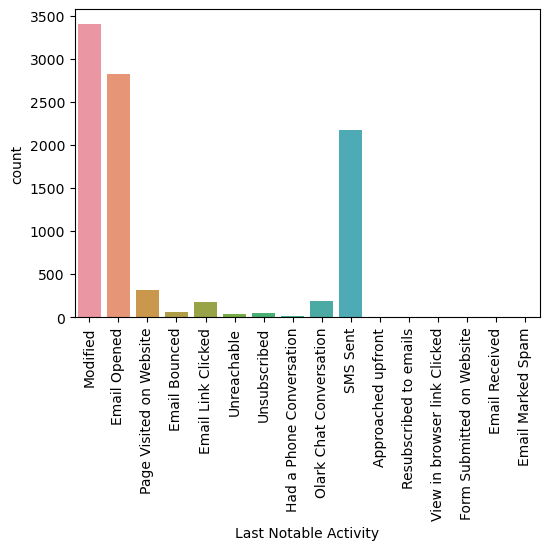

In [31]:
#let's plot count plot for the object type variables.
for i in leads_obj_col:
    print("Countplot of",i)
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_Leads[i])
    plt.xticks(rotation=90)
    plt.show()

### insights from the above countplot are:
1. Factor with which the customer was identified by lead is 'Landing page submission'. It has 53% value and the highest among the other factors.
2. Maximum cutomers source for the navigation to the company's website is Google followed by direct traffic. In the era of internet it is expected also.
3. Most of the customers have not choosen 'Do not mail'.
4. Most of the customers have not choosed 'Do not call'.
5. Email opened followed by the SMS sent were the last activity done by the customer.
6. Most of the customers are from India.
7. Most of the customers are unemployed.
8. Most of the customers are searching for the course for their better career prospects.
9. Most of the customers have not searched any of the ads related to X Education.
10. Many customers have not seen the newspaper article about the course provided by the company.
11. Most of the customers have not seen the ads for X Education Forum.
12. Most of the customers have not seen the ads for course in newspaper .
13. Most of the customers have not seen the ads for course in Didital Media as well.
14. Most of the customers are not through recommendations.
15. Most of the customers don't want 'free copy of mastering the interviews'.
16. Modified,email open and SMS sent are the major last activities done by the students.
17. Most of the customers are from finance management.
18. Most of the customers are tagged as 'will revert after reading'.
19. Most of the customers are from city Mumbai.

In [32]:
#Assigning all numeric type column to below list
leads_numeric_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(leads_numeric_col)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


### Analysing target variable i.e Converted

In [33]:
#Analysing the Target data i.e Converted
#Looking below ,we can see 39 % of customers who visited the site have converted to leads or joined the course.
df_Leads.Converted.value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

0    61.461039
1    38.538961
Name: Converted, dtype: float64


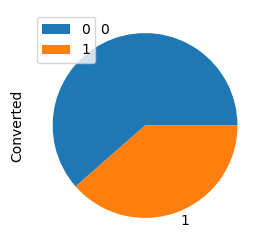

In [34]:
#lets draw pie chart
print(df_Leads.Converted.value_counts(normalize=True)*100)
plt.figure(figsize=(3,3) )
df_Leads.Converted.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

### Analysing numeric data

Boxplot of TotalVisits


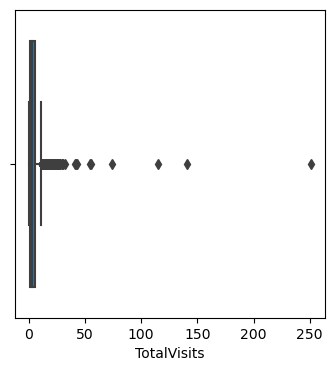

Boxplot of Total Time Spent on Website


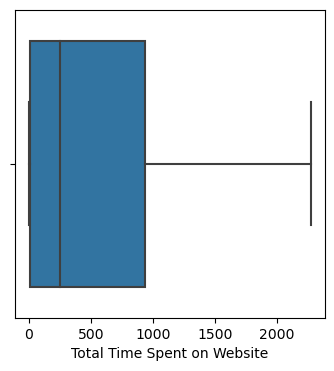

Boxplot of Page Views Per Visit


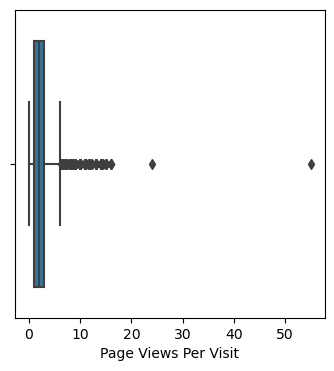

In [35]:
for i in leads_numeric_col:
    plt.figure(figsize=(4,4))
    print("Boxplot of",i)
    sns.boxplot(x=df_Leads[i])
    plt.show()

Histplot of TotalVisits


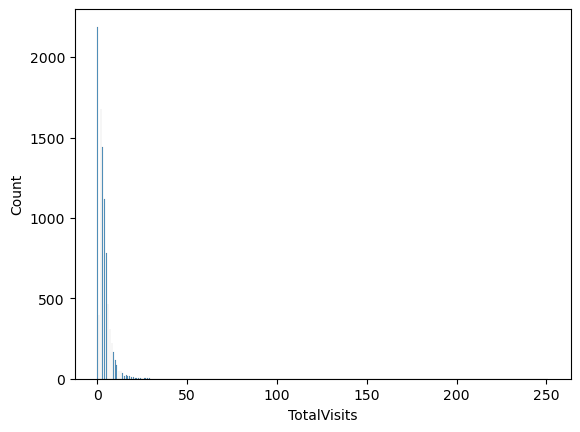

Histplot of Total Time Spent on Website


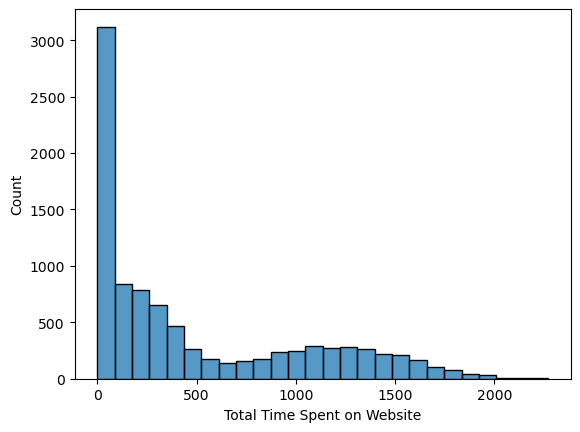

Histplot of Page Views Per Visit


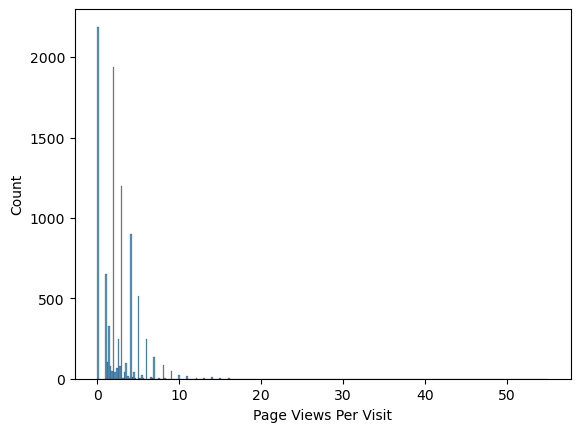

In [36]:
for i in leads_numeric_col:
    print("Histplot of",i)
    sns.histplot(x=df_Leads[i])
    plt.show()

#### insights from the above boxplot and histplot are:
1. Theoretically TotalVisits have outliers around 250 but it can be ignored. Most of the values are around 0.0.
2. 75% of total time spent on website is less than 1000.It's value at maximum at zero and then decreases and again increases        between 1000 to 1500.
3. 75% of page Views per visit is less than 5. It's value is maximum at zero and decreases till 10.

## Bivariate Analysis for leads dataset

Countplot of Lead Origin


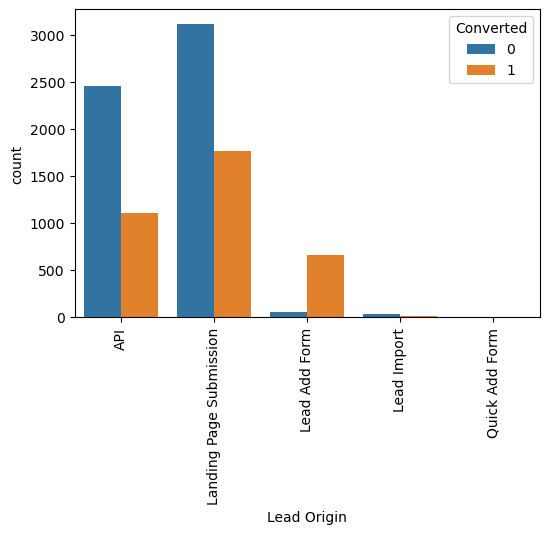

Countplot of Lead Source


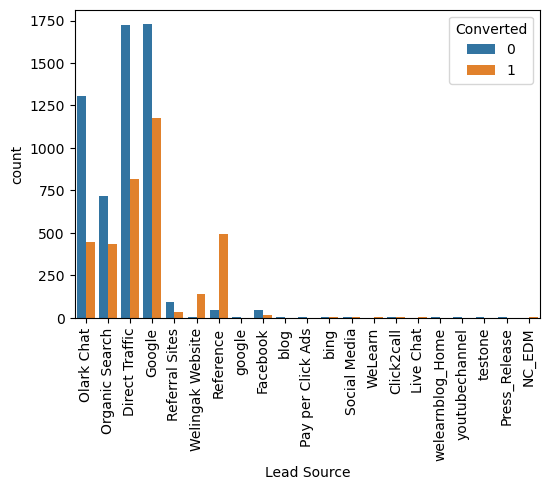

Countplot of Do Not Email


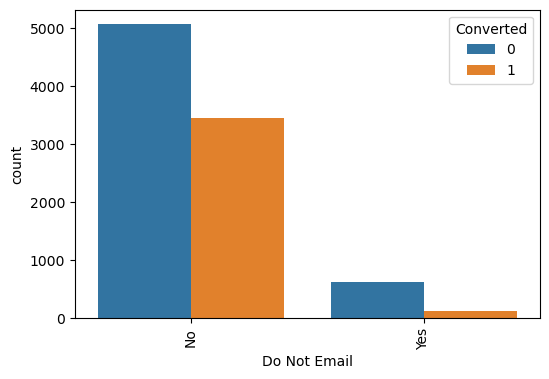

Countplot of Do Not Call


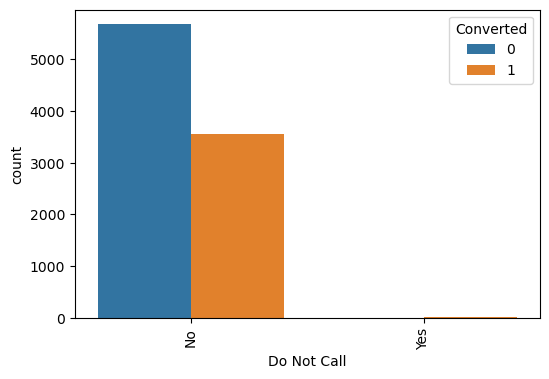

Countplot of Last Activity


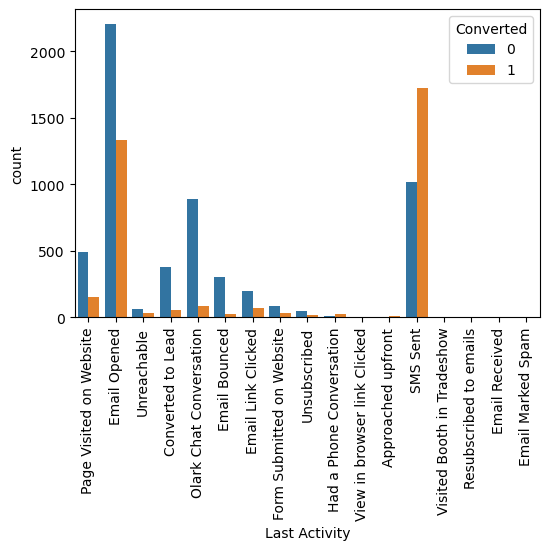

Countplot of Country


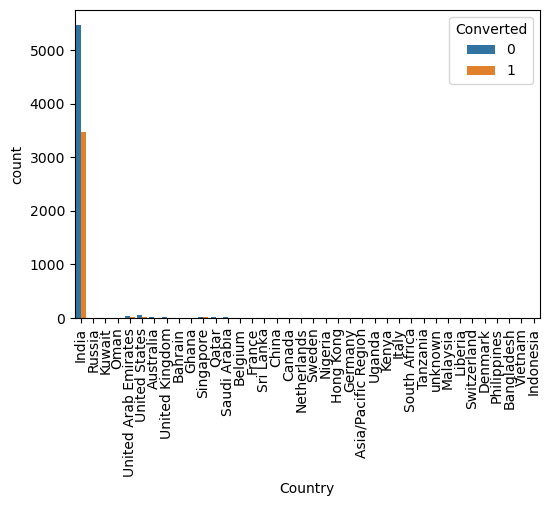

Countplot of Specialization


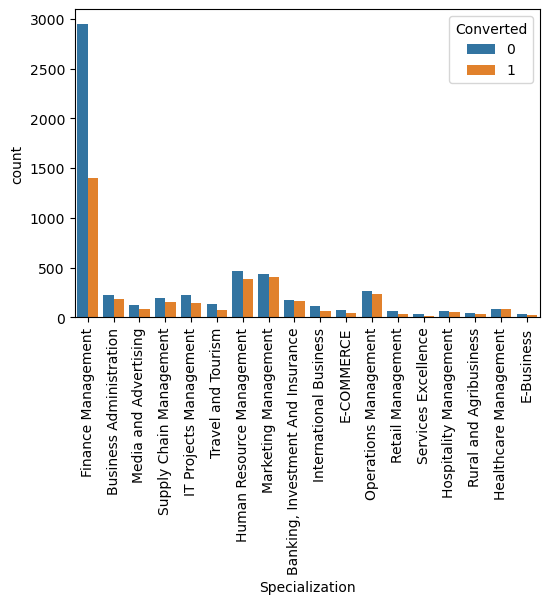

Countplot of What is your current occupation


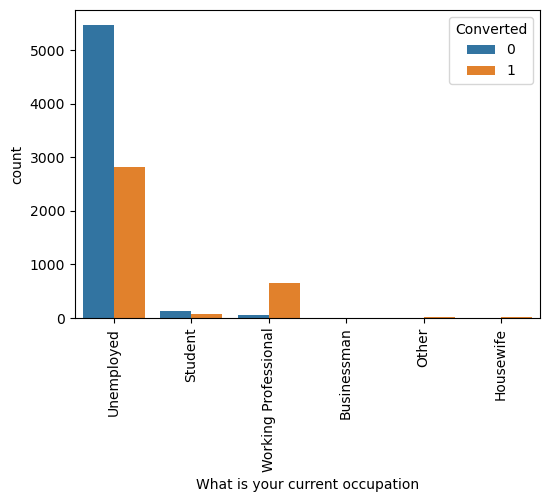

Countplot of What matters most to you in choosing a course


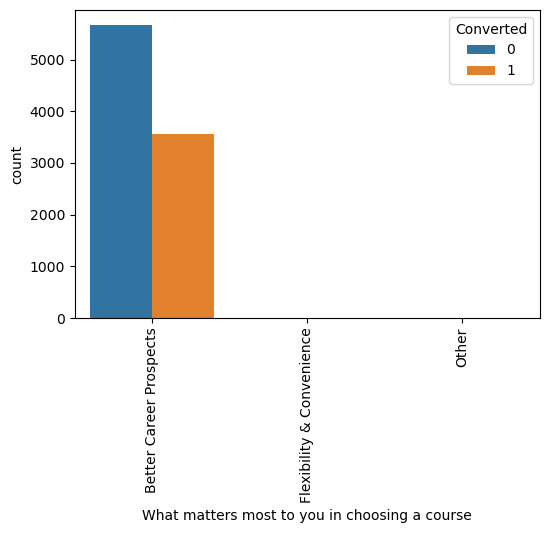

Countplot of Search


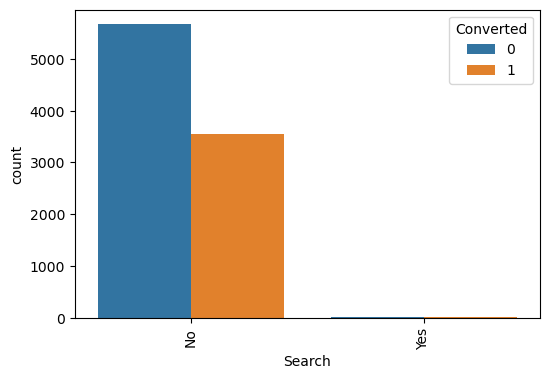

Countplot of Newspaper Article


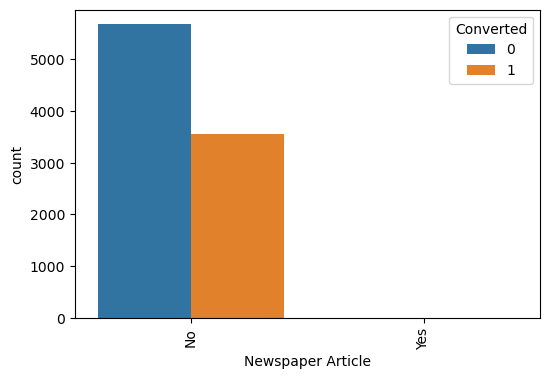

Countplot of X Education Forums


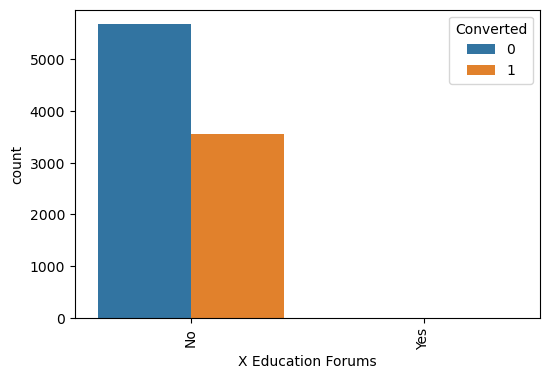

Countplot of Newspaper


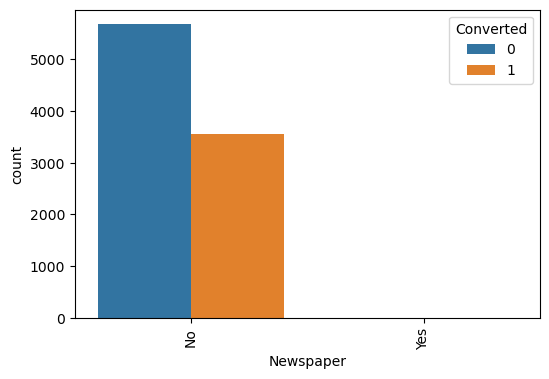

Countplot of Digital Advertisement


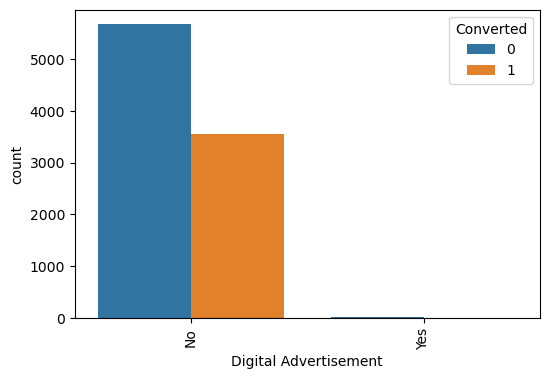

Countplot of Through Recommendations


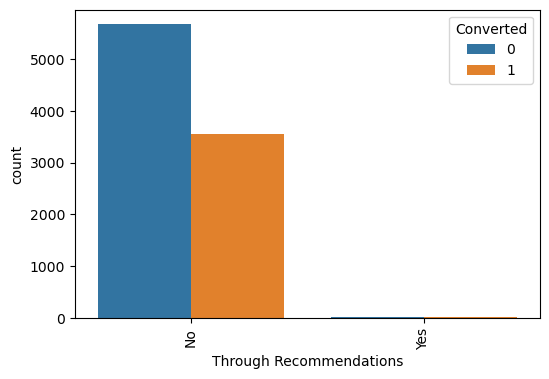

Countplot of Tags


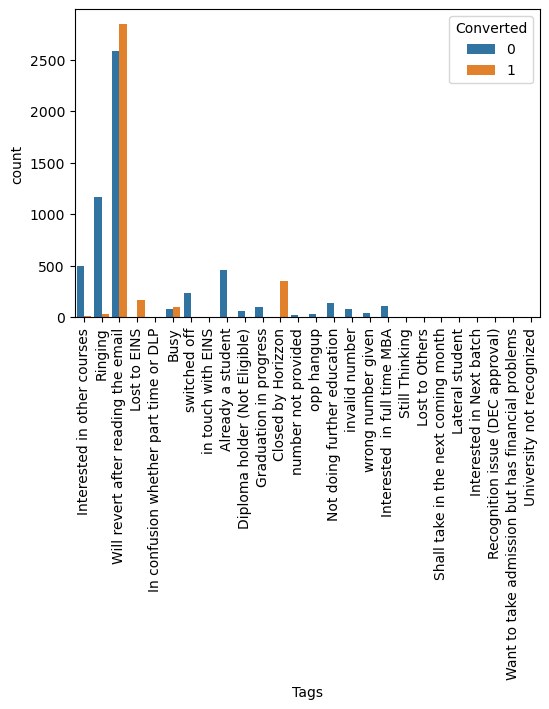

Countplot of City


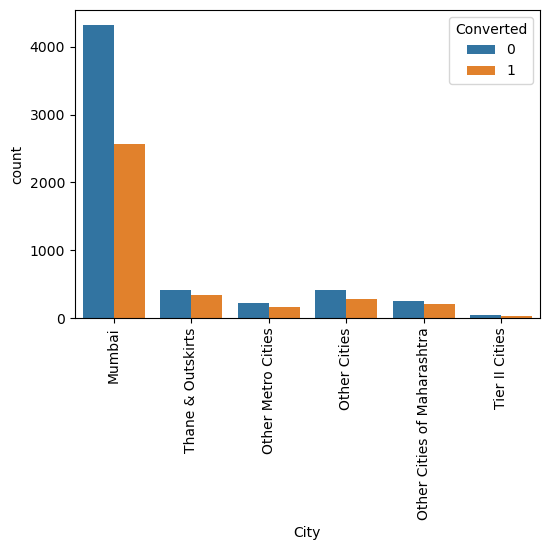

Countplot of A free copy of Mastering The Interview


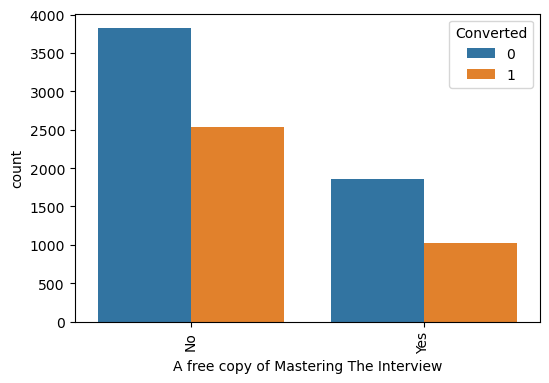

Countplot of Last Notable Activity


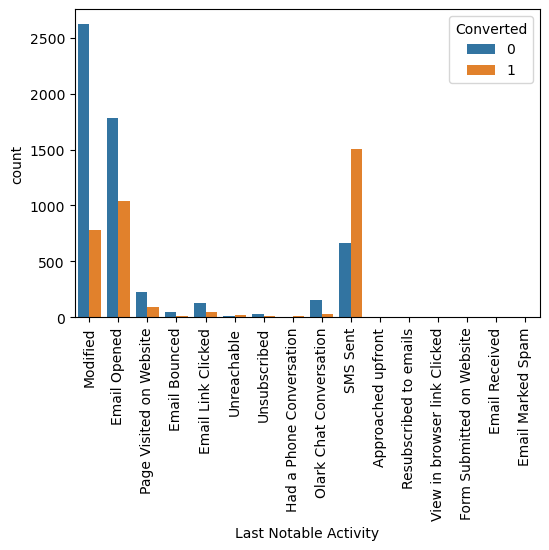

In [37]:
for i in leads_obj_col:
    print("Countplot of",i)
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_Leads[i],hue='Converted',data=df_Leads)
    plt.xticks(rotation=90)
    plt.show()

#### insights from the above are:
1. Loading Page submission has max. number of customers getting converted. But Lead Add Form is very efficient way of converting    to leads.
2. Google gives the max.leads converted.Reference is giving the right faith to the customers(referred one) that's why they are      more converted.
3. Customer's who did not opted for 'do not email' or 'do not call' have high chance of converting to leads.
4. Customers with last activity as email opened or SMS sent have more chances of converting to leads.SMS sent is proved to be      more better option to influence.
5. Customers from India have the more chances of converting to leads compared to outside India.
6. Unemployed and the working professionals have the more influence towards taking up the course.
7. Customer desiring for better career prospects are showing more conversion rate.
8. Customers who have not searched about the X Education have more conversion rates.
9. Customers who have not read/seen the newspaper article about the company have more conversion rates.
10. People not aware of the X Education forums are converting to leads.
11. People who have not read about X Education via newspaper/digital ads/recommendations have shown good conversion rates.
12. Customers who haven't  asked for a free copy of mastering the interview are also showing the good conversion rates.
13. Last notable activity of student with SMS sent shows maximum conversion rate.
14. Most of the converted leads are from India.
15. People from MUmbai have good conversion rates.

TotalVisits Vs Converted


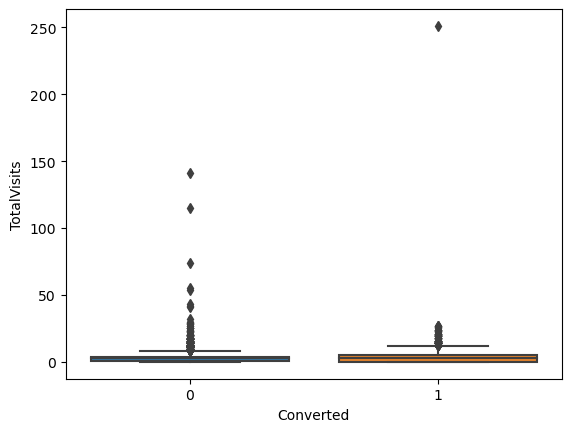

Total Time Spent on Website Vs Converted


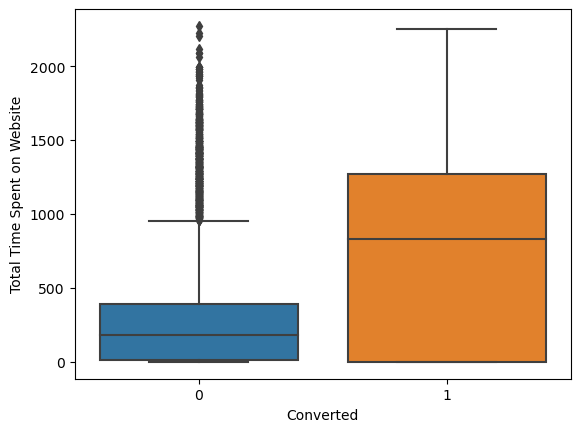

Page Views Per Visit Vs Converted


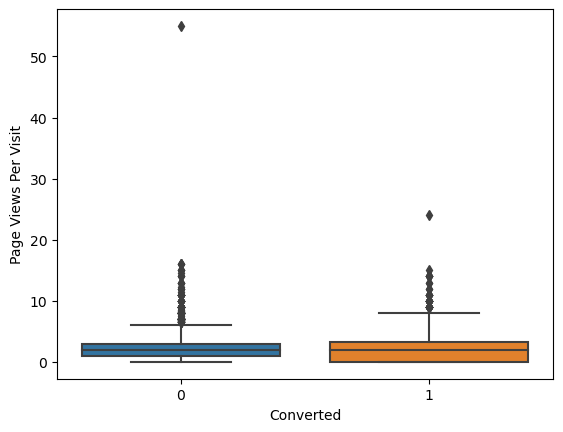

In [38]:
for i in leads_numeric_col:
    print(i,"Vs",'Converted')
    sns.boxplot(y=df_Leads[i],x=df_Leads['Converted'])
    plt.show()

#### insights from the above are:
1. TotalVisits with extreme minimum and maximum values have the more chances of conversion.
2. For total time spend on websites has more chances of conversion below 1500.
3. Conversion rate is more densed around 0 to 25 for Page views per visit.

## Multivariate Analysis for leads data

In [39]:
leads_numeric_col=df_Leads.columns[(df_Leads.dtypes=='int64') | (df_Leads.dtypes=='float64')].tolist()
print(leads_numeric_col)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


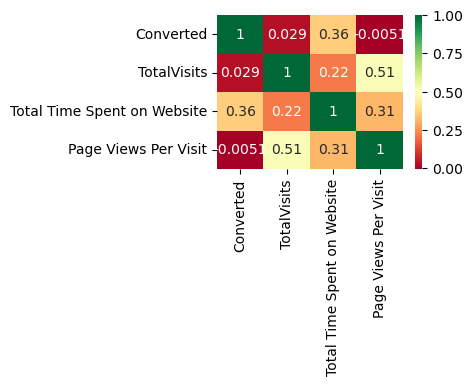

In [40]:
plt.figure(figsize=(3,2))
sns.heatmap(df_Leads[leads_numeric_col].corr(),annot=True, cmap='RdYlGn')
plt.show()

#### insights from the above are:
1. We can see only one correlation between totalVisits and the  Page Views per Visit i.e 0.51.
   This is an obvious relation as well.

In [41]:
#From above EDA we can see many columns have 99% of data as one value.Dropping them.
df_Leads.drop(columns=["Do Not Call","What matters most to you in choosing a course","Search","Newspaper Article","Digital Advertisement","Through Recommendations","Newspaper","X Education Forums"],inplace=True)


In [42]:
df_Leads.shape

(9240, 15)

## Creating dummy Variable

In [43]:
df_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [44]:
#pre-processing the data
#Assigning all object type column to below list
leads_obj_col=[]
leads_obj_col=df_Leads.columns[df_Leads.dtypes=='object'].tolist()
print(leads_obj_col)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [45]:
# creating dummy variables for categorical column and deleting the first colum for each in one go
df_Leads = pd.get_dummies(data=df_Leads, columns=leads_obj_col, drop_first=True)

In [46]:
#Checking the values
df_Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
#Let's convert all boolean data to int type
cols=df_Leads.columns.to_list()
for col in cols:
    if df_Leads[col].dtype=="bool":
        df_Leads[col]=df_Leads[col].astype("uint8")

In [48]:
#Checking the dummies created
pd.set_option('display.max_rows', None)
pd.DataFrame(df_Leads.columns)

,0
0,Converted
1,TotalVisits
2,Total Time Spent on Website
3,Page Views Per Visit
4,Lead Origin_Landing Page Submission
5,Lead Origin_Lead Add Form
6,Lead Origin_Lead Import
7,Lead Origin_Quick Add Form
8,Lead Source_Direct Traffic
9,Lead Source_Facebook


In [49]:
#Checking number of columns
df_Leads.shape

(9240, 150)

## Test-Train split

In [50]:
#importing library 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#Creating X and y var.
X=df_Leads.drop("Converted", 1)
y=df_Leads["Converted"]

In [52]:
#Converted is removed
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [53]:
#checking y.
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
#Creating test and train split with 70:30 ratio.
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [55]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (6468, 149)
Test X shape: (2772, 149)
Train y shape: (6468,)
Test y shape: (2772,)


### Scaling

In [56]:
#Using scaler to rescale the data.

scaler=StandardScaler()
leads_numeric_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[leads_numeric_col] = scaler.fit_transform(X_train[leads_numeric_col])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.100767,0.005716,-0.470569,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.290067,1.365219,1.226321,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Feature Selection and Model building

In [57]:
#Selecting features using Recursive Feature Elimination
#For logistic regression importing library
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm


In [58]:
#We are using hybrid approach for selecting features i.e manual and automated(Recursive feature elimination)
#First we will use RFE to cut down features to 15 and then manually deducting the features upto 11 features.

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(X_train,y_train)
selector.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False,

In [59]:
cols_to_keep=X_train.columns[selector.support_]

In [60]:
#Columns filtered by the RFE
cols_to_keep

Index(['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [61]:
#Keeping the filtered columns in train data sets
X_train=X_train[cols_to_keep]

### Model 1

In [62]:
#Using Generalised Linear Model for creating models
X_train_sm = sm.add_constant(X_train)
model1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.8
Date:                Tue, 21 May 2024   Deviance:                       4147.6
Time:                        12:57:09   Pearson chi2:                 1.16e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0978      0.208    -19.689      0.000      -4.506      -3.690
Lead Origin_Lead Add Form                                2.4038      0.213     11.271      0.000       1.986       2.822
Do Not Email_Yes                                        -1.4320      0.171     -8.354      0.000      -1.768      -1.096
Last Activity_Olark Chat Conversation                   -1.7036      0.164    -10.377      0.000      -2.025      -1.382
What is your current occupation_Working Professional     2.8980      0.232     12.509      0.000       2.444       3.352
Tags_Busy                                                3.0193      0.298     10.141      0.000       2.436       3.603
Tags_Closed by Horizzon                                  8.7506      1.027      8.520      0.000       6.738      10.764
Tags_Interested in Next batch                           24.4030      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Tags_Lateral student                                    25.8717   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Tags_Lost to EINS                                        8.2410      0.750     10.986      0.000       6.771       9.711
Tags_Ringing                                            -1.1039      0.305     -3.622      0.000      -1.701      -0.507
Tags_Will revert after reading the email                 3.5918      0.209     17.168      0.000       3.182       4.002
Tags_in touch with EINS                                  2.9423      0.763      3.858      0.000       1.448       4.437
Tags_switched off                                       -1.2705      0.555     -2.290      0.022      -2.358      -0.183
Last Notable Activity_Had a Phone Conversation           3.5546      1.312      2.709      0.007       0.983       6.127
Last Notable Activity_SMS Sent                           2.4830      0.109     22.757      0.000       2.269       2.697
========================================================================================================================
"""

In [63]:
#calculating VIF and displaying it.

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,6.165801
1,Lead Origin_Lead Add Form,1.202447
2,Do Not Email_Yes,1.019289
3,Last Activity_Olark Chat Conversation,1.069616
4,What is your current occupation_Working Profes...,1.092620
5,Tags_Busy,1.115063
6,Tags_Closed by Horizzon,1.366388
7,Tags_Interested in Next batch,1.008214
8,Tags_Lateral student,1.003257
9,Tags_Lost to EINS,1.086181


#### Inference:
P-value is highest for 'Tags_Interested in Next batch'.

In [64]:
#Dropping column 'Tags_Interested in Next batch'
X_train=X_train.drop(['Tags_Interested in Next batch'],axis=1)

###  Model 2

In [65]:
#Creating model2
X_train_sm = sm.add_constant(X_train)
model2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.4
Date:                Tue, 21 May 2024   Deviance:                       4164.7
Time:                        12:57:09   Pearson chi2:                 1.15e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9621      0.195    -20.336      0.000      -4.344      -3.580
Lead Origin_Lead Add Form                                2.4084      0.213     11.333      0.000       1.992       2.825
Do Not Email_Yes                                        -1.4112      0.170     -8.278      0.000      -1.745      -1.077
Last Activity_Olark Chat Conversation                   -1.6999      0.164    -10.362      0.000      -2.021      -1.378
What is your current occupation_Working Professional     2.8713      0.229     12.555      0.000       2.423       3.320
Tags_Busy                                                2.8685      0.289      9.930      0.000       2.302       3.435
Tags_Closed by Horizzon                                  8.6138      1.024      8.409      0.000       6.606      10.622
Tags_Lateral student                                    24.7324   1.39e+04      0.002      0.999   -2.71e+04    2.72e+04
Tags_Lost to EINS                                        8.1037      0.746     10.856      0.000       6.641       9.567
Tags_Ringing                                            -1.2660      0.295     -4.285      0.000      -1.845      -0.687
Tags_Will revert after reading the email                 3.4508      0.196     17.614      0.000       3.067       3.835
Tags_in touch with EINS                                  2.8037      0.760      3.689      0.000       1.314       4.293
Tags_switched off                                       -1.4323      0.550     -2.605      0.009      -2.510      -0.355
Last Notable Activity_Had a Phone Conversation           3.5044      1.287      2.724      0.006       0.983       6.026
Last Notable Activity_SMS Sent                           2.5137      0.109     22.993      0.000       2.299       2.728
========================================================================================================================
"""

In [66]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,6.144852
1,Lead Origin_Lead Add Form,1.202217
2,Do Not Email_Yes,1.019194
3,Last Activity_Olark Chat Conversation,1.069612
4,What is your current occupation_Working Profes...,1.092423
5,Tags_Busy,1.114103
6,Tags_Closed by Horizzon,1.365415
7,Tags_Lateral student,1.003236
8,Tags_Lost to EINS,1.085818
9,Tags_Ringing,1.577391


#### Inference: 
'Tags_Lateral student' has highest p-value.

In [67]:
#Dropping column 'Tags_Lateral student'
X_train=X_train.drop(['Tags_Lateral student'],axis=1)

#### Model 3

In [68]:
#Creating model3
X_train_sm = sm.add_constant(X_train)
model3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Tue, 21 May 2024   Deviance:                       4181.1
Time:                        12:57:09   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8818      0.188    -20.594      0.000      -4.251      -3.512
Lead Origin_Lead Add Form                                2.4157      0.212     11.395      0.000       2.000       2.831
Do Not Email_Yes                                        -1.4143      0.170     -8.306      0.000      -1.748      -1.081
Last Activity_Olark Chat Conversation                   -1.7018      0.164    -10.380      0.000      -2.023      -1.380
What is your current occupation_Working Professional     2.8545      0.227     12.575      0.000       2.410       3.299
Tags_Busy                                                2.7904      0.285      9.806      0.000       2.233       3.348
Tags_Closed by Horizzon                                  8.5334      1.023      8.340      0.000       6.528      10.539
Tags_Lost to EINS                                        8.0240      0.745     10.772      0.000       6.564       9.484
Tags_Ringing                                            -1.3429      0.291     -4.611      0.000      -1.914      -0.772
Tags_Will revert after reading the email                 3.3717      0.190     17.778      0.000       3.000       3.743
Tags_in touch with EINS                                  2.7239      0.758      3.592      0.000       1.238       4.210
Tags_switched off                                       -1.5079      0.548     -2.754      0.006      -2.581      -0.435
Last Notable Activity_Had a Phone Conversation           3.4726      1.273      2.728      0.006       0.978       5.968
Last Notable Activity_SMS Sent                           2.5090      0.109     23.031      0.000       2.295       2.722
========================================================================================================================
"""

In [69]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,6.128651
1,Lead Origin_Lead Add Form,1.201378
2,Do Not Email_Yes,1.019084
3,Last Activity_Olark Chat Conversation,1.069544
4,What is your current occupation_Working Profes...,1.092352
5,Tags_Busy,1.113735
6,Tags_Closed by Horizzon,1.364268
7,Tags_Lost to EINS,1.085516
8,Tags_Ringing,1.575313
9,Tags_Will revert after reading the email,1.873031


#### Inference: 
'Tags_switched off' has highest p-value.

In [70]:
#Dropping column 'Tags_switched off'
X_train=X_train.drop(['Tags_switched off'],axis=1)

#### Model4

In [71]:
#Creating model 4
X_train_sm = sm.add_constant(X_train)
model4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.7
Date:                Tue, 21 May 2024   Deviance:                       4191.5
Time:                        12:57:09   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4941
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1657      0.181    -23.071      0.000      -4.520      -3.812
Lead Origin_Lead Add Form                                2.4334      0.213     11.437      0.000       2.016       2.850
Do Not Email_Yes                                        -1.4147      0.170     -8.328      0.000      -1.748      -1.082
Last Activity_Olark Chat Conversation                   -1.7044      0.164    -10.383      0.000      -2.026      -1.383
What is your current occupation_Working Professional     2.8952      0.230     12.565      0.000       2.444       3.347
Tags_Busy                                                3.0969      0.275     11.253      0.000       2.558       3.636
Tags_Closed by Horizzon                                  8.8152      1.022      8.627      0.000       6.813      10.818
Tags_Lost to EINS                                        8.3085      0.743     11.183      0.000       6.852       9.765
Tags_Ringing                                            -1.0217      0.280     -3.643      0.000      -1.571      -0.472
Tags_Will revert after reading the email                 3.6612      0.180     20.293      0.000       3.308       4.015
Tags_in touch with EINS                                  3.0123      0.755      3.992      0.000       1.533       4.491
Last Notable Activity_Had a Phone Conversation           3.5809      1.325      2.703      0.007       0.985       6.177
Last Notable Activity_SMS Sent                           2.4601      0.107     23.074      0.000       2.251       2.669
========================================================================================================================
"""

In [72]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,5.374701
1,Lead Origin_Lead Add Form,1.200724
2,Do Not Email_Yes,1.019046
3,Last Activity_Olark Chat Conversation,1.067201
4,What is your current occupation_Working Profes...,1.091608
5,Tags_Busy,1.093741
6,Tags_Closed by Horizzon,1.341384
7,Tags_Lost to EINS,1.073491
8,Tags_Ringing,1.468771
9,Tags_Will revert after reading the email,1.667550


#### Inference:
 'Last Notable Activity_Had a Phone Conversation' has highest p-value.

In [73]:
#Dropping column 'Last Notable Activity_Had a Phone Conversation'
X_train=X_train.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1)

#### Model 5

In [74]:
#Creating p-value
X_train_sm = sm.add_constant(X_train)
model5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2102.9
Date:                Tue, 21 May 2024   Deviance:                       4205.8
Time:                        12:57:09   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1502      0.180    -23.042      0.000      -4.503      -3.797
Lead Origin_Lead Add Form                                2.4260      0.213     11.398      0.000       2.009       2.843
Do Not Email_Yes                                        -1.4224      0.170     -8.382      0.000      -1.755      -1.090
Last Activity_Olark Chat Conversation                   -1.7152      0.164    -10.453      0.000      -2.037      -1.394
What is your current occupation_Working Professional     2.8939      0.230     12.587      0.000       2.443       3.345
Tags_Busy                                                3.0865      0.275     11.234      0.000       2.548       3.625
Tags_Closed by Horizzon                                  8.8013      1.022      8.614      0.000       6.799      10.804
Tags_Lost to EINS                                        8.2961      0.743     11.167      0.000       6.840       9.752
Tags_Ringing                                            -1.0274      0.280     -3.667      0.000      -1.576      -0.478
Tags_Will revert after reading the email                 3.6567      0.180     20.310      0.000       3.304       4.010
Tags_in touch with EINS                                  2.9980      0.754      3.975      0.000       1.520       4.476
Last Notable Activity_SMS Sent                           2.4501      0.107     22.999      0.000       2.241       2.659
========================================================================================================================
"""

In [75]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,5.372981
1,Lead Origin_Lead Add Form,1.200517
2,Do Not Email_Yes,1.018844
3,Last Activity_Olark Chat Conversation,1.066669
4,What is your current occupation_Working Profes...,1.091297
5,Tags_Busy,1.093741
6,Tags_Closed by Horizzon,1.341357
7,Tags_Lost to EINS,1.073469
8,Tags_Ringing,1.468760
9,Tags_Will revert after reading the email,1.666810


#### Inference:
All p-values and VIF's are in range. We can accept model5 as final model.

## Evaluation

In [76]:
#Predicting y train data using model5
y_train_pred = result5.predict(X_train_sm)
y_train_pred[:10]

1871    0.005610
6795    0.379061
3516    0.005610
8105    0.061367
3934    0.379061
4844    0.992236
3297    0.005610
8071    0.999953
987     0.379061
7423    0.876156
dtype: float64

In [77]:
#Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00560978, 0.37906063, 0.00560978, 0.06136652, 0.37906063,
       0.99223579, 0.00560978, 0.99995327, 0.37906063, 0.87615591])

In [78]:
#Converting to dataframe.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.005610,1871
1,0,0.379061,6795
2,0,0.005610,3516
3,0,0.061367,8105
4,0,0.379061,3934


In [79]:
#adding predicted column using cutoff as 0.5.
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.005610,1871,0
1,0,0.379061,6795,0
2,0,0.005610,3516,0
3,0,0.061367,8105,0
4,0,0.379061,3934,0


In [80]:
#Creating confusion matrix.
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3873  129]
 [ 793 1673]]


In [81]:
#evaluating the metrics
print('Accuracy: ' ,metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Recall: ",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Precision: ",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy:  0.857452071737786
Recall:  0.6784266017842661
Precision:  0.9284128745837957


In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
#false positive rate i.e these percent of cutomers could not convert.
print(FP/ float(TN+FP))

0.03223388305847077


In [84]:
#positive predictive value
print (TP / float(TP+FP))

0.9284128745837957


In [85]:
#Negative predictive value
print (TN / float(TN+ FN))

0.830047149592799


### Plotting ROC

In [86]:
#function draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


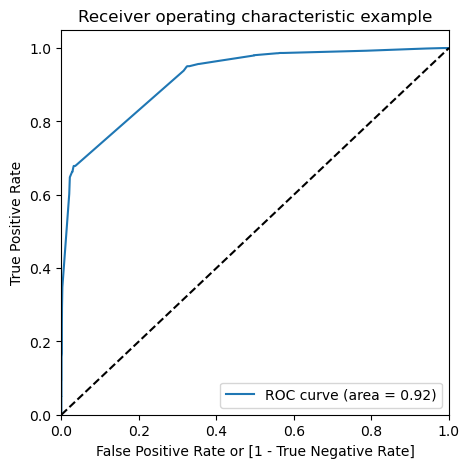

In [88]:
#We can see we got good area=0.92 close to 1.
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Optimal cutoff

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0


In [90]:
# printing the accuracy,recall and precision for each probability cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.737786  0.964315  0.598201
0.2   0.2  0.776747  0.950527  0.669665
0.3   0.3  0.781231  0.938362  0.684408
0.4   0.4  0.855288  0.678427  0.964268
0.5   0.5  0.857452  0.678427  0.967766
0.6   0.6  0.857761  0.678427  0.968266
0.7   0.7  0.853896  0.663828  0.971014
0.8   0.8  0.854205  0.662206  0.972514
0.9   0.9  0.749845  0.347932  0.997501


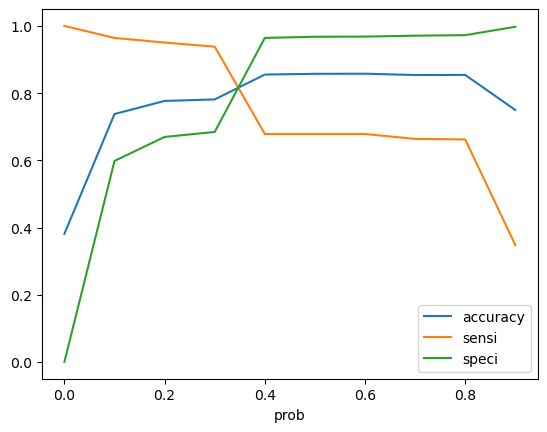

In [91]:
#Plotting the three metrics cutoff can be taken as 0.35 or 0.38
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
#taking cutoff=.35 and evaluating final predicted value.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [93]:
#As per cutoff=0.35, adding the leadscore
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.005610,1871,0,1
1,0,0.379061,6795,1,38
2,0,0.005610,3516,0,1
3,0,0.061367,8105,0,6
4,0,0.379061,3934,1,38


In [94]:
# Let's check the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))
print("Recall: ",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))
print("Precision: ",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Accuracy:  0.781230674087817
Recall:  0.9383617193836172
Precision:  0.6469108191221694


In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2739, 1263],
       [ 152, 2314]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
#False Postive Rate
print(FP/ float(TN+FP))

0.315592203898051


In [98]:
#Positive predictive value
print (TP / float(TP+FP))

0.6469108191221694


In [99]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9474230370114147


In [100]:
#plotting precision-recall curve
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

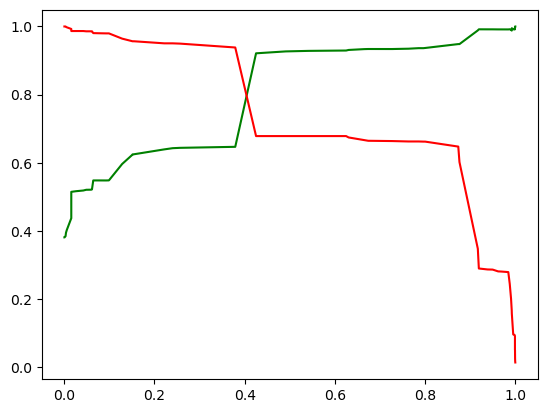

In [101]:
#cutoff is near 0.4
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [102]:
#Checking the train set for cutoff=3.8
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.005610,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.379061,6795,0,1,1,1,1,0,0,0,0,0,0,0,38
2,0,0.005610,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.061367,8105,0,1,0,0,0,0,0,0,0,0,0,0,6
4,0,0.379061,3934,0,1,1,1,1,0,0,0,0,0,0,0,38


In [103]:
# Let's check all metrics.
print("Accuracy",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))
print("Recall",metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))
print("Precision",metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Accuracy 0.8552875695732839
Recall 0.6784266017842661
Precision 0.9212555066079295


In [104]:
confusionMatrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusionMatrix

array([[3859,  143],
       [ 793, 1673]], dtype=int64)

#### Scaling Test data

In [105]:
#Scaling the test data, any ways the Model5 does not contain any continuous data so this step is optional
leads_numeric_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[leads_numeric_col] = scaler.fit_transform(X_test[leads_numeric_col])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,1.320947,0.933036,2.669778,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-0.961886,-0.900812,-1.130671,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0.464884,-0.793792,1.244609,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,-0.961886,-0.900812,-1.130671,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-0.961886,-0.900812,-1.130671,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#adding only columns selected by RFE.
X_test = X_test[cols_to_keep]
X_test.head()

,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7766,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4359,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Prediction on test data

In [107]:
#Checking the final columns selected in Model5
X_train.columns.to_list()

['Lead Origin_Lead Add Form',
 'Do Not Email_Yes',
 'Last Activity_Olark Chat Conversation',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_in touch with EINS',
 'Last Notable Activity_SMS Sent']

In [108]:
#Creating final columns list in Model5
final_cols=X_train.columns.to_list()

In [109]:
#Adding constant
X_test_sm = sm.add_constant(X_test[final_cols])

In [110]:
#Predicting the y from Xtest data
y_test_pred = result5.predict(X_test_sm)
y_test_pred[:10]

4269    0.876156
2376    0.987660
7766    0.916856
9199    0.002828
4359    0.873522
9186    0.876156
1631    0.379061
8963    0.379061
8007    0.379061
5324    0.876156
dtype: float64

In [111]:
#Converting to dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)

In [112]:
#Checking values
y_test_pred_df.head()

,0
4269,0.876156
2376,0.987660
7766,0.916856
9199,0.002828
4359,0.873522


In [113]:
#Converting ytest to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
#Adding index to the dataframe
y_test_df['Prospect ID'] = y_test_df.index

In [115]:
#reseting the index to concatinate the two dataframes
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
#Concatinating
y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

In [117]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.876156
1,1,2376,0.987660
2,1,7766,0.916856
3,0,9199,0.002828
4,1,4359,0.873522


In [118]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [119]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.876156
1,1,2376,0.987660
2,1,7766,0.916856
3,0,9199,0.002828
4,1,4359,0.873522


In [120]:
#adding lead score to the test data frame
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [121]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.876156,88
1,2376,1,0.987660,99
2,7766,1,0.916856,92
3,9199,0,0.002828,0
4,4359,1,0.873522,87


In [122]:
#Evaluating the final predicted value cutoff=0.35
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [123]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.876156,88,1
1,2376,1,0.987660,99,1
2,7766,1,0.916856,92,1
3,9199,0,0.002828,0,0
4,4359,1,0.873522,87,1


In [124]:
#calculating the matrices
print("Accuracy: ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))
print("Recall: ",metrics.recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))
print("Precision: ",metrics.precision_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy:  0.7828282828282829
Recall:  0.947945205479452
Precision:  0.6557169930511687


In [125]:
confusionMatrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusionMatrix

array([[1132,  545],
       [  57, 1038]], dtype=int64)

### Final Observation:
Let us compare the values obtained for Train & Test:
   
#### Train Data:
    
1. Accuracy: 78.12%
2. Recall:  93.83%
3. Precision:  64.69%

#### Test Data: 
1. Accuracy:  78.28%
2. Recall:  94.79%
3. Precision:  65.57%
    
#### Inferernce:
We can see that that at cut off 3.5 recall value is very good and we can go for it. Model is explaining well the conversion rate. Test data and train data are in sync and acceptable.


### Final Features are:

1. Lead Origin_Lead Add Form
2. Do Not Email_Yes
3. Last Activity_Olark Chat Conversation
4. What is your current occupation_Working Professional
5. Tags_Busy
6. Tags_Closed by Horizzon
7. Tags_Lost to EINS
8. Tags_Ringing
9. Tags_Will revert after reading the email
10. Tags_in touch with EINS
11. Last Notable Activity_SMS Sent